# Visualization

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">
    
[![Binder](https://mybinder.org/badge_logo.svg)](https://binder.materials-data.space/v2/gh/simphony/docs/dome4.0?filepath=docs%2Fusage%2Fvisualization.ipynb "Click to run this tutorial yourself!")
    
</figure>

SimPhoNy includes two visualization tools:

- [semantic2dot](#semantic2dot) to visualize ontology entities, including both assertional and terminological knowledge,
- [pretty_print](#pretty_print), used to "visualize" ontology individuals as text.

## `semantic2dot`

`semantic2dot` makes use of [Graphviz](https://graphviz.org/) and is located under `simphony_osp.tools.semantic2dot`. It can be used to quickly draw ontologies, as well as ontology individuals. In the representations created by the tool, each ontology entity is represented by a graph node. The relationships between ontology entities are the edges connecting them. The attributes values and classes that individuals belong to are written inside the nodes.

To **draw a namespace** from an installed ontology, import the namespace and pass the namespace object to `semantic2dot`. Several namespace objects can be drawn together in the same picture.

In [3]:
!pico install city foaf

In [2]:
from simphony_osp.namespaces import city, foaf
from simphony_osp.tools import semantic2dot

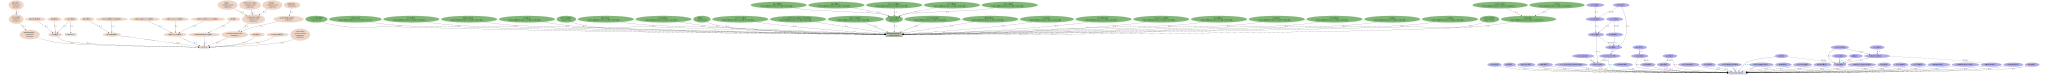

In [4]:
semantic2dot(city, foaf)

<div class="admonition important">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Tip</div></div>
    
On most web browsers (including mobile ones), you can right-click the picture above and then click "open in new tab" to see the picture in its full size.
    
</div>

It is also possible to **draw the contents of a session**. To do so, pass the session object to `semantic2dot`.

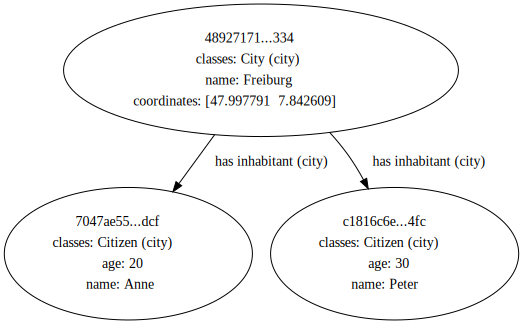

In [5]:
from simphony_osp.session import core_session

freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
peter = city.Citizen(name="Peter", age=30)
anne = city.Citizen(name="Anne", age=20)
freiburg[city.hasInhabitant] += peter, anne

semantic2dot(core_session)

Another option is to **draw only specific ontology individuals**.

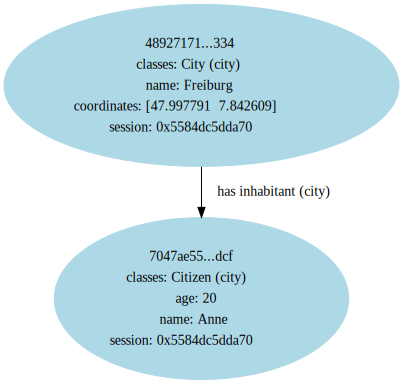

In [6]:
semantic2dot(freiburg, anne)

Any combination of such three types of object, any number of times can be provided.

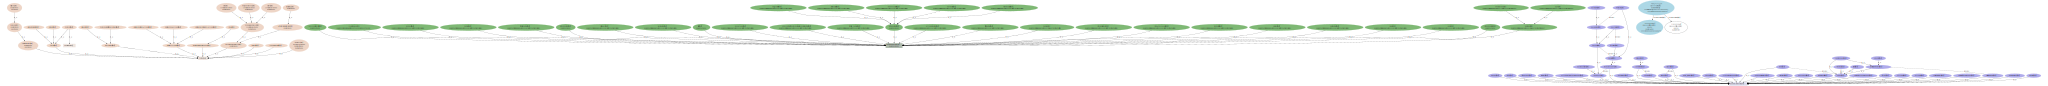

In [7]:
semantic2dot(foaf, city, core_session, freiburg, anne)

A relationship can optionally be passed to `semantic2dot` so that it automatically calls the [find](sessions/search.ipynb#find) method from the search module on all ontology individuals and includes the additional individuals in the picture. 

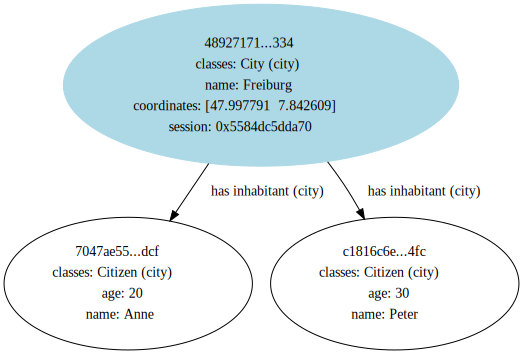

In [8]:
from simphony_osp.namespaces import owl

semantic2dot(freiburg, rel=owl.topObjectProperty)

`semantic2dot` automatically renders its output as `svg` image files on Jupyter notebooks. However, it is possible to save the generated figures in `gv` (Graphviz) and `png` formats using the `render` method.

In [10]:
semantic2dot(freiburg, rel=owl.topObjectProperty).render("./picture.gv")

After running the code above, two files, `picture.gv` and `picture.gv.png`, are generated in the current directory.

## `pretty_print`

`pretty_print` is located under `simphony_osp.tools.pretty_print`. It generates a tree-like, text-based representation stemming from a given ontology individual, that includes the IRI, ontology classes and attributes of the involved individuals, as well as the relationships connecting them.

In [11]:
from simphony_osp.tools import pretty_print

pretty_print(freiburg)

- Ontology individual:
  identifier: 48927171-fd87-42d7-9f40-be7a4f9b7334
  type: City (city)
  superclasses: City (city), Populated Place (city), Thing (owl), Geographical Place (city)
  values:  coordinates: [47.997791  7.842609]
           name: Freiburg
   |_Relationship has inhabitant (city):
     - Ontology individual of class Citizen
      . identifier: 7047ae55-f831-44bc-aa25-6f654c17cdcf
      .  age: 20
      .  name: Anne
     - Ontology individual of class Citizen
        identifier: c1816c6e-c441-408f-b0cc-d99641d4f4fc
         age: 30
         name: Peter


`pretty_print` recursively finds the ontology individuals that are connected to the given one using the [find](sessions/search.ipynb#find) method from the search module. By default, all relationships are followed, but the relationships to follow can be restricted using the keyword argument `rel`. In the example below, the search has been restricted to several relationships that do not exist between `freiburg` and its citizens. Therefore, only `freiburg` is displayed as output.

In [13]:
pretty_print(freiburg, rel=(city.hasWorker, city.hasMajor))

- Ontology individual:
  identifier: 48927171-fd87-42d7-9f40-be7a4f9b7334
  type: City (city)
  superclasses: City (city), Populated Place (city), Thing (owl), Geographical Place (city)
  values:  coordinates: [47.997791  7.842609]
           name: Freiburg
